In [31]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import itertools

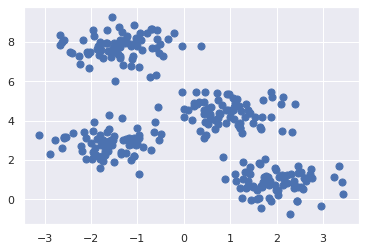

In [16]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

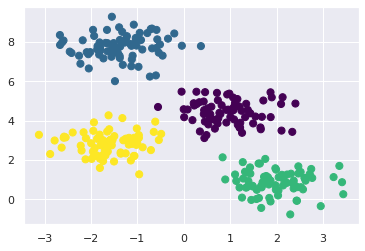

In [17]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

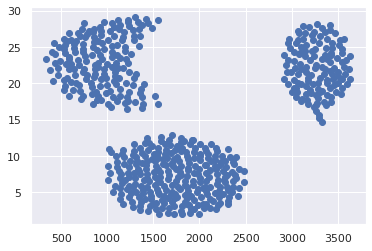

In [28]:
with open('cluster.dat') as f:
    lines = f.readlines()
    x = [float(line.split()[0]) for line in lines]
    y = [float(line.split()[1]) for line in lines]
plt.plot(x, y,'ob')
plt.show()

In [37]:
Points = np.array(list(itertools.product(x, y)))

In [44]:
print(Points)

[[1555.     28.65]
 [1555.     27.55]
 [1555.     28.35]
 ...
 [3440.     26.  ]
 [3440.     26.15]
 [3440.     25.6 ]]
